### **Decision Tree**

##### Import & Data

In [67]:
# Klasik importlarımız
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Veri yükleme ve ilk izlenim 
df = pd.read_csv("penguins.csv")
df.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [69]:
# Null verilerin olduğu sütunlar
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [70]:
# İçinde null olan verilerimizi düşürdük 
df.dropna(inplace= True)
df.isna().sum().sum() # Null olan veri sayımız : 0

0

In [71]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [72]:
# Yukarıda göründüğü gibi verimizin içinde hatalı bir "." verisi var bunu da düşürelim

df = df[df["sex"] != "."]

In [73]:
df["sex"].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [74]:
# Makine öğrenimine uygun olmayan yazısal verilerimizi sayısal şekle getirmek için get_dummies kullandık

pd.get_dummies(df.drop("species", axis=1),drop_first= True)
df.head(1)
# Alttaki satırda da gözüktüğü gibi verimiz makine öğrenimine verilebilir şekile geldi

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE


In [75]:
# X ve y mizi belirleyeceğiz

X = pd.get_dummies(df.drop("species", axis =1), drop_first=True)
y = df["species"]

#### Train Test Split

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

#### Modelimizi Oluşturalım

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier() #!#! İçindeki parametrelerin özelliklerini aşşağıya yazıyorum
model.fit(X_train, y_train)

DecisionTreeClassifier()

1. criterion
Bu parametre, bir düğümde yapılacak bölmenin (split) kalitesini ölçmek için kullanılan kriteri belirler.

"gini": Gini safsızlığı hesaplanır. Gini indeksi, bir düğümdeki sınıfların ne kadar homojen olduğunu ölçer; düşük değer, daha saf bir düğüm anlamına gelir.
"entropy" ve "log_loss": Her iki seçenek de Shannon entropisine dayalı bilgi kazancı hesaplaması yapar. Bu ölçümler, bir bölünme sonrasında düğümdeki belirsizliğin ne kadar azaldığını belirler.
2. splitter
Bu parametre, her düğümde hangi bölmenin yapılacağını seçme stratejisini belirler.

"best": Tüm olası bölmeler incelenir ve en iyi olanı seçilir.
"random": Rastgele seçilen alt kümeler üzerinden bölme yapılır. Bu yöntem, özellikle büyük veri setlerinde hesaplama süresini azaltabilir ve modelde bir çeşit rastgelelik ekleyerek aşırı uyum riskini düşürebilir.
3. max_depth
Ağacın maksimum derinliğini sınırlar.

None: Eğer bu parametre belirtilmezse, ağacın derinliği; düğümlerin tamamen saflaşması veya min_samples_split kriterine göre yeterli örnek kalmaması durumuna kadar artmaya devam eder.
Sınırlı bir derinlik belirlemek, aşırı uyum (overfitting) riskini azaltmaya yardımcı olur.
4. min_samples_split
Bir iç düğümün bölünebilmesi için gerekli minimum örnek sayısını veya oranını belirtir.

int değeri: Kesin bir örnek sayısı olarak yorumlanır.
float değeri: Veri setindeki toplam örnek sayısına göre oran olarak değerlendirilir (örneğin, 0.05 değeri, mevcut örneklerin %5’i kadar örneğin olması gerektiğini ifade eder).
Bu parametre, düğümlerin çok az örnekle bölünerek modelin gereksiz yere karmaşıklaşmasını engeller.
5. min_samples_leaf
Her bir yaprak düğümde bulunması gereken minimum örnek sayısını veya oranını belirler.

int değeri: Yaprak düğümde bulunması gereken en az örnek sayısını belirtir.
float değeri: Örnek sayısının oranı olarak yorumlanır.
Bu parametre, özellikle aşırı özel (spesifik) bölünmelerden kaçınarak modelin genelleme yeteneğini artırır.
6. min_weight_fraction_leaf
Örneklerin ağırlıklandırıldığı durumlarda, bir yaprak düğümde bulunması gereken minimum toplam ağırlık oranını belirler.

Eğer örnekler eşit ağırlıklı değilse, bu parametre her yaprakta yeterli ağırlığın bulunmasını sağlayarak, düşük ağırlıklı örneklerden kaynaklanan sapmaları azaltır.
7. max_features
Bölme sırasında değerlendirilecek özellik (feature) sayısını sınırlar.

int değeri: Her bölmede bakılacak maksimum özellik sayısı.
float değeri: Özelliklerin oranı olarak değerlendirilir; max(1, int(max_features * n_features_in_)) ifadesiyle hesaplanır.
"sqrt": Özellik sayısının karekökü kadar özellik değerlendirilir.
"log2": Logaritma tabanında (taban 2) özellik sayısı kadar özellik incelenir.
None: Tüm özellikler değerlendirilir.
Bu parametre, özellikle büyük boyutlu veri setlerinde modelin daha hızlı eğitilmesine ve aşırı uyum riskinin azaltılmasına yardımcı olur.
8. random_state
Modeldeki rastgelelik içeren işlemleri kontrol eden tohum değerini belirler.

Bu parametre, modelin tekrar üretilebilir sonuçlar vermesi için sabitlenebilir.
Bir tamsayı ya da RandomState örneği olarak ayarlanabilir.
Sabit bir random_state kullanmak, aynı eğitim verileri üzerinde modelin her çalıştırıldığında aynı bölünmeleri ve sonuçları üretmesini sağlar.
9. max_leaf_nodes
Ağaç yapısındaki maksimum yaprak düğüm sayısını belirler.

Bu parametre ayarlandığında, ağaç en iyi dallanmaları (saflık veya bilgi kazancı bazlı) göz önünde bulundurarak büyür.
Sınırlı sayıda yaprak düğüm, modelin karmaşıklığını kontrol altında tutar ve aşırı uyum riskini azaltır.
10. min_impurity_decrease
Her bir bölünmede, düğümdeki safsızlık azalmasının (impurity decrease) en az bu değerden büyük olması durumunda bölme yapılır.

Ağırlıklı safsızlık azalışı, mevcut düğümdeki örnek sayısına ve bölünmeden sonra oluşan alt düğümlerdeki safsızlık değerlerine bağlı olarak hesaplanır.
Bu parametre, gereksiz veya çok küçük iyileştirmeler sağlayan bölünmelerin yapılmasını engeller, böylece modelin daha sağlam ve genelleyici olması sağlanır.
11. class_weight
Sınıflara atanan ağırlıkları belirleyerek, modelin eğitim sürecinde farklı sınıflara farklı önem vermesini sağlar.

dict: Örneğin, {0: 1, 1: 2} şeklinde tanımlanabilir; burada sınıf 1, sınıf 0'a göre iki kat daha fazla ağırlığa sahiptir.
"balanced": Sınıfların frekanslarına bağlı olarak otomatik ayarlama yapar; az temsil edilen sınıfların modelde daha fazla etkili olmasını sağlar.
Bu özellik, özellikle dengesiz veri setlerinde modelin tüm sınıflara karşı duyarlı kalmasını sağlar.
12. ccp_alpha
Minimal Maliyet-Kompleksite Budaması (Cost-Complexity Pruning) için kullanılan karmaşıklık parametresidir.

Bu değer arttıkça, model daha fazla budanır; yani, gereksiz dallanmalar kaldırılarak ağaç daha basit hale getirilir.
Böylece, modelin aşırı uyum (overfitting) yapması engellenir ve genelleme yeteneği artırılır.
13. monotonic_cst
Bu parametre, her bir özellik için uygulanacak monotonluk kısıtlamalarını belirler.

1: Özellik değeri arttıkça, pozitif sınıfın olasılığının artması beklenir (monoton artan).
-1: Özellik değeri arttıkça, pozitif sınıfın olasılığının azalması beklenir (monoton azalan).
0: Hiçbir kısıtlama yoktur.
Özellikle bazı uygulamalarda, modelin karar verme sürecinde belirli özelliklerin etkisinin tek yönlü olması istenebilir. Ancak; çok sınıflı, çok çıkışlı (multioutput) problemler veya eksik veri içeren durumlarda bu kısıtlamalar desteklenmez.

In [86]:
test_pred = model.predict(X_test)

#### Değerlendirme

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [91]:
confusion_matrix(test_pred, y_test)

array([[43,  1,  0],
       [ 2, 22,  0],
       [ 1,  0, 31]], dtype=int64)

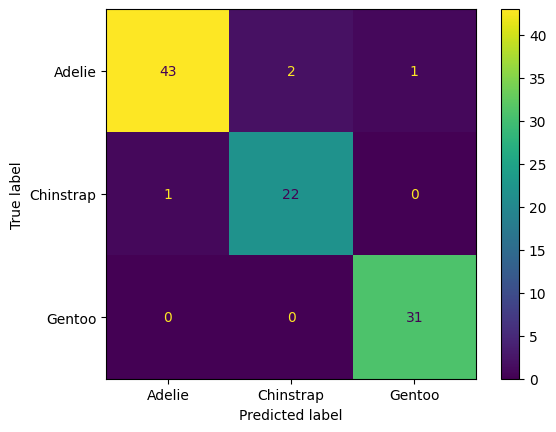

In [92]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [93]:
print(classification_report(test_pred, y_test))

              precision    recall  f1-score   support

      Adelie       0.93      0.98      0.96        44
   Chinstrap       0.96      0.92      0.94        24
      Gentoo       1.00      0.97      0.98        32

    accuracy                           0.96       100
   macro avg       0.96      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100



In [94]:
model.feature_importances_
# Özellik Önemlilik derecesi

array([0.35848776, 0.00185354, 0.55096018, 0.01124952, 0.06844939,
       0.        , 0.00899961])

#### Görselleştirme

In [95]:
from sklearn.tree import plot_tree

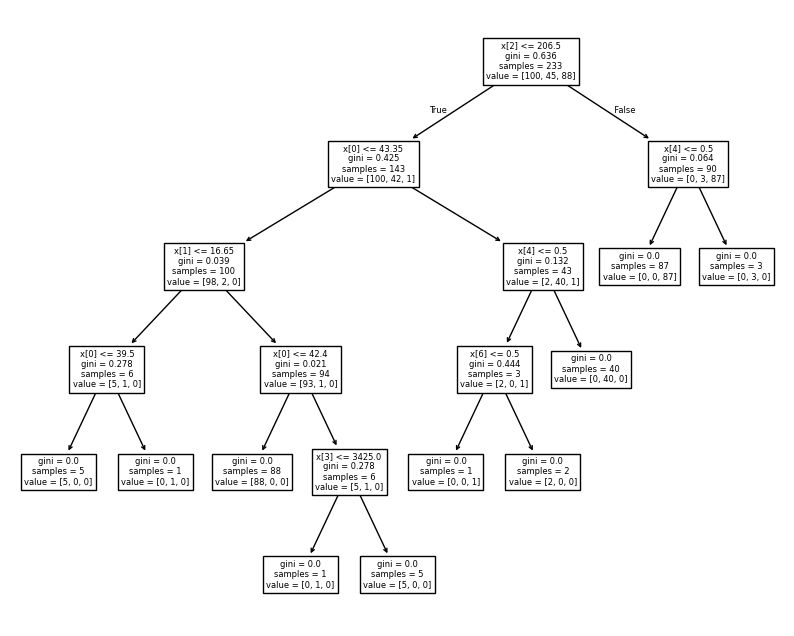

In [96]:
plt.figure(figsize=(10,8))
plot_tree(model);

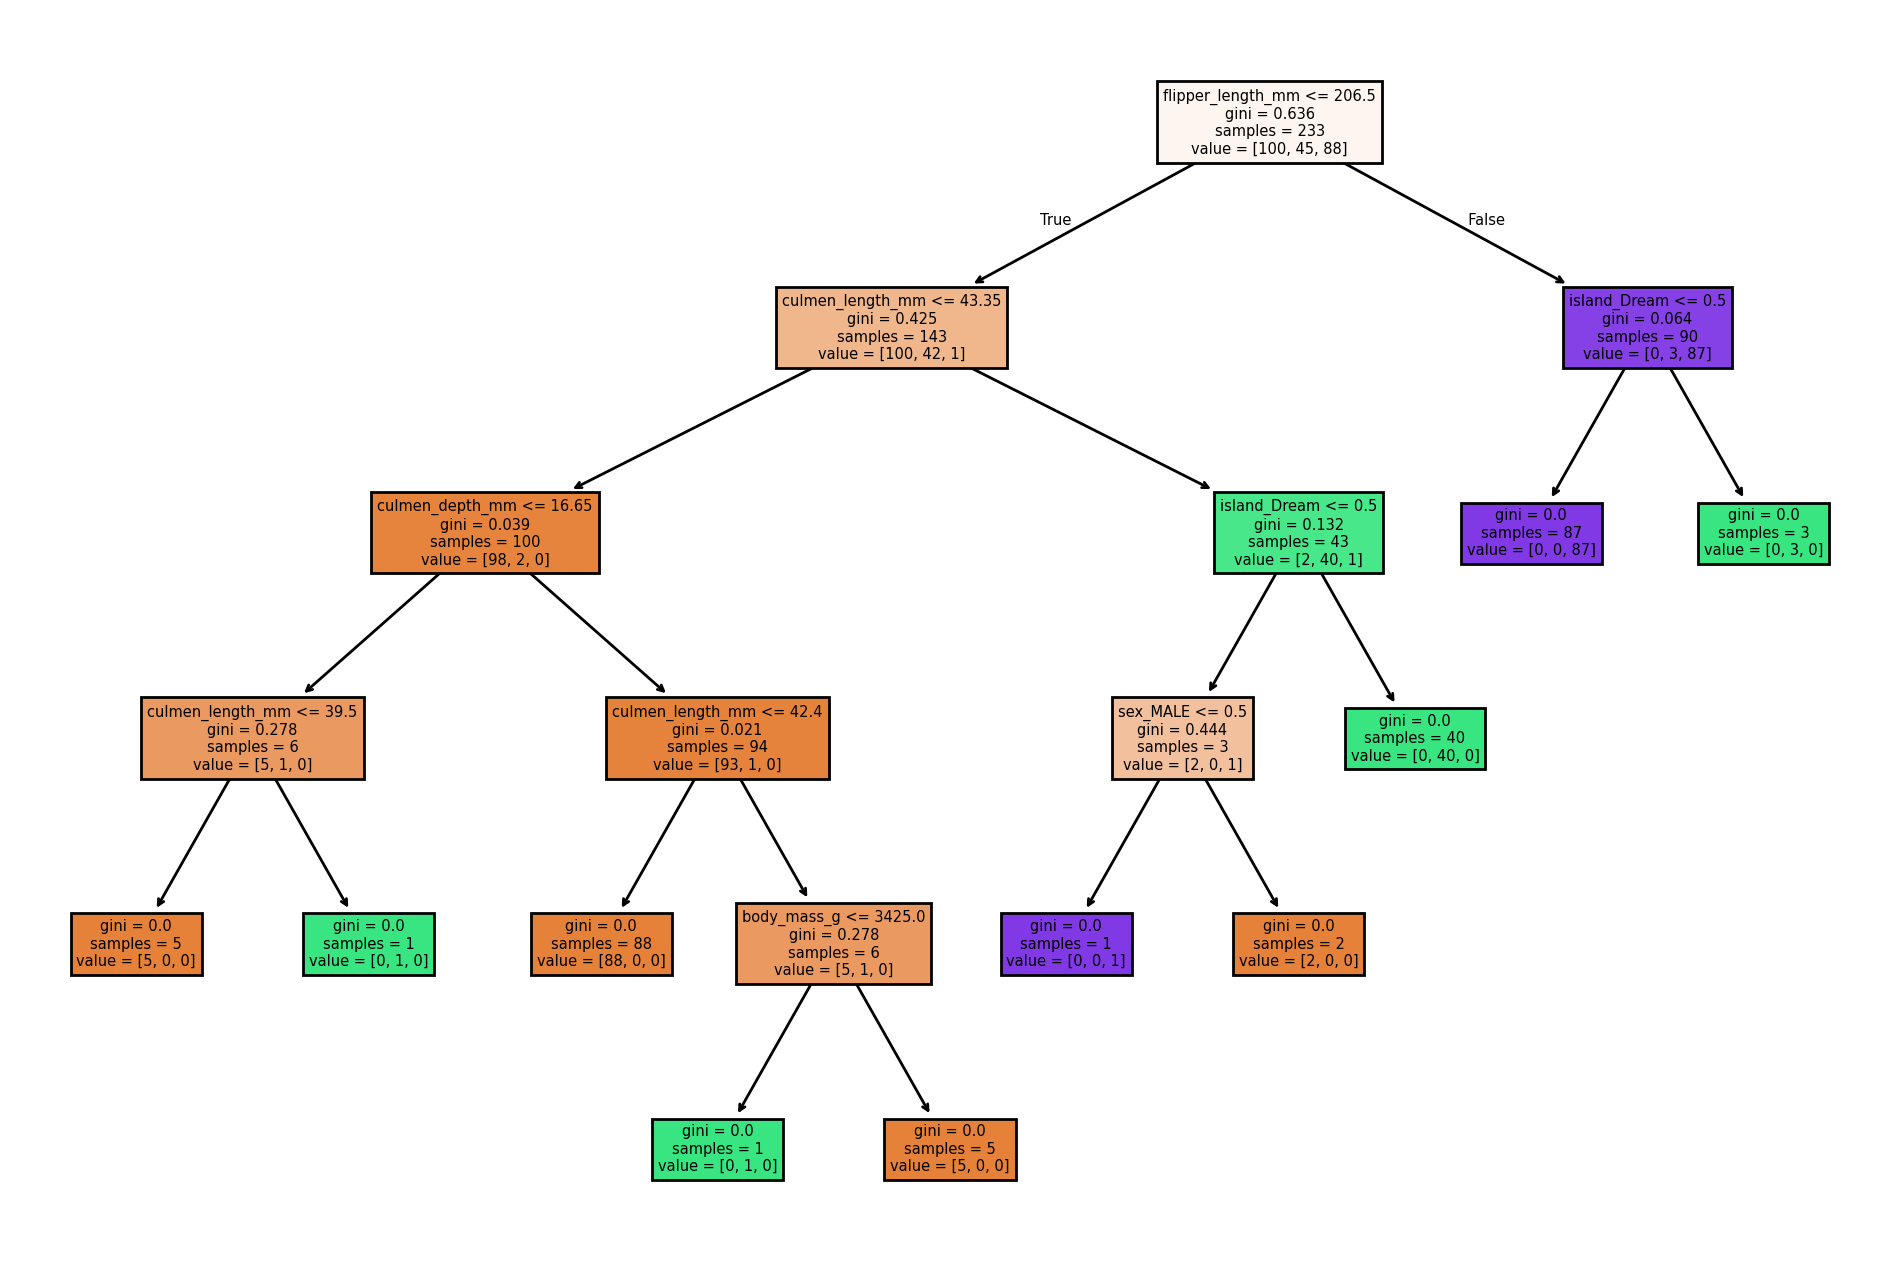

In [97]:
plt.figure(figsize=(12,8), dpi=200)
plot_tree(model, filled= True, feature_names=X.columns);

### Parametrelerle Oynamakk

In [101]:
# Aşşağıdaki fonksiyonu yazarak içine verdiğimiz parametrelerini belirlediğimiz ağaç modelimizi bizim şuana kadar baktığımız nasıl çalıştığı ile ilgili bilgieri getirmesini istiyoruz


def model_sonuc(model):
    pengu_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    print(classification_report(pengu_pred, y_test), "\n")
    plt.figure(figsize=(10,6),dpi=200)
    plot_tree(model, filled= True, feature_names=X.columns);


In [102]:
az_derinlik = DecisionTreeClassifier(max_depth=2)
az_derinlik.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.91      0.93      0.92        45
   Chinstrap       0.87      0.87      0.87        23
      Gentoo       1.00      0.97      0.98        32

    accuracy                           0.93       100
   macro avg       0.93      0.92      0.93       100
weighted avg       0.93      0.93      0.93       100
 



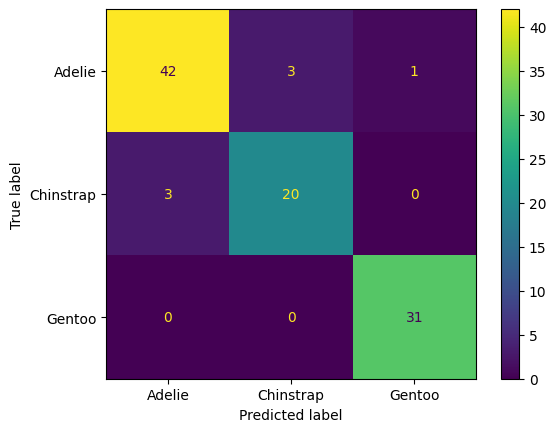

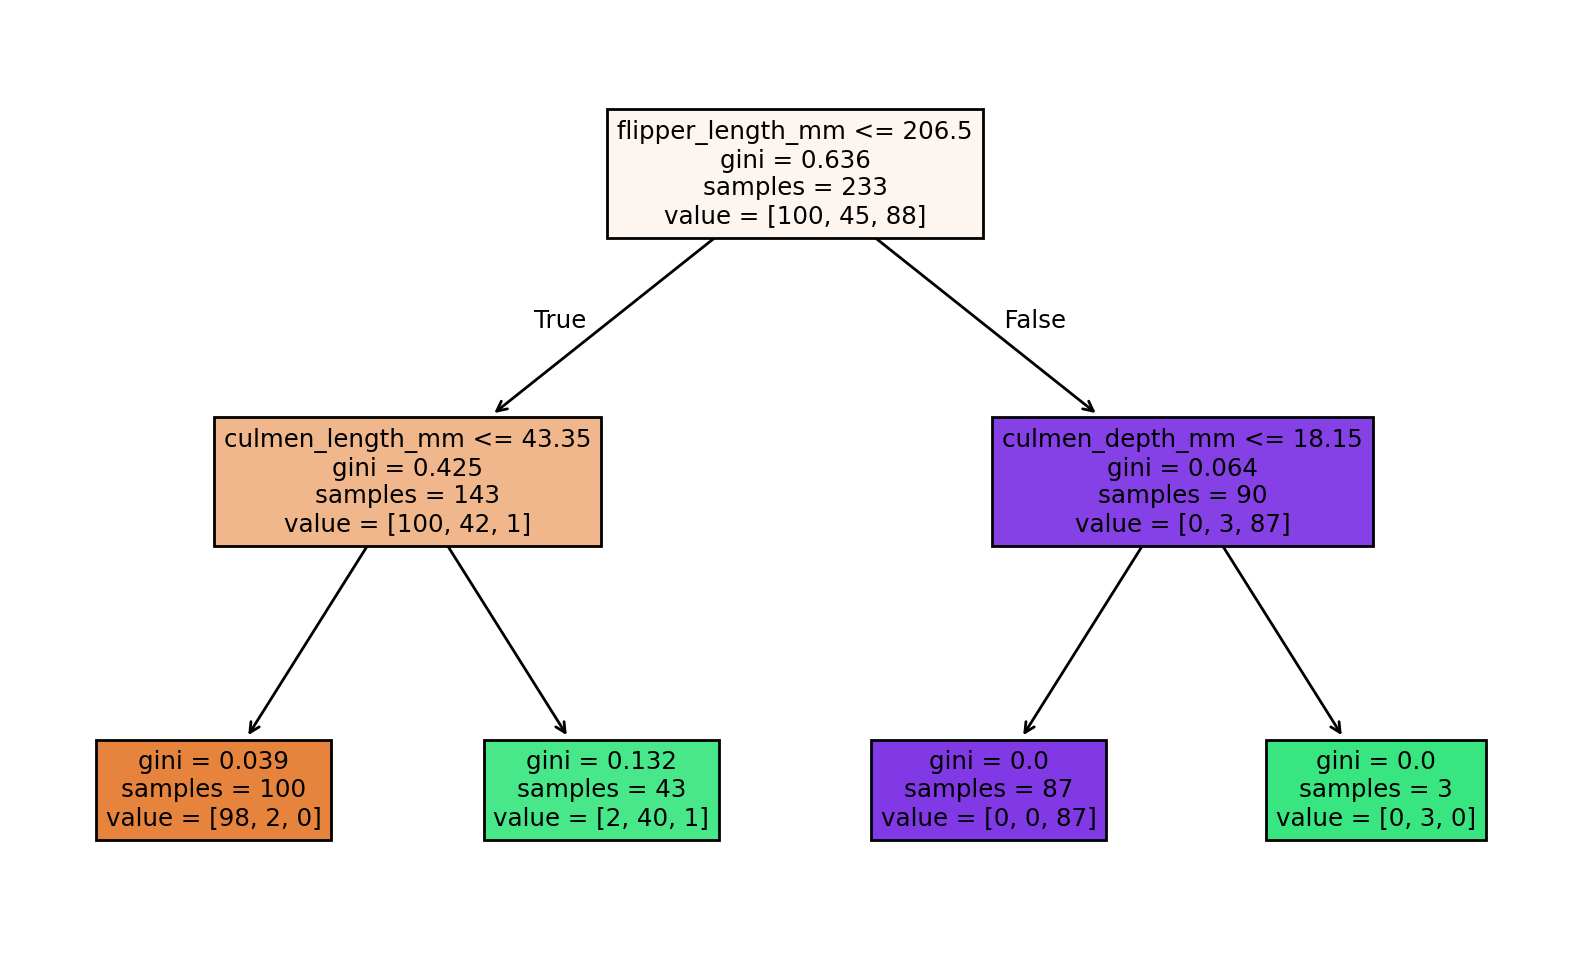

In [103]:
model_sonuc(az_derinlik)